In [1]:
import pandas as pd
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import preprocessing 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
df=pd.read_csv('Live.csv')
df.drop_duplicates(inplace=True)


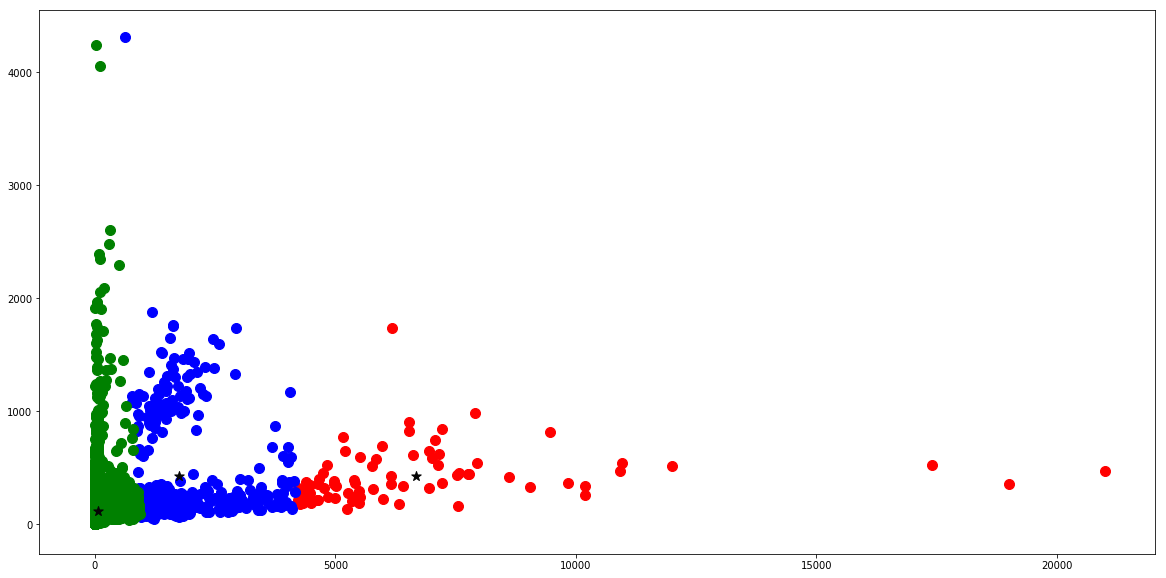

In [2]:
df.drop('status_type',axis=1, inplace=True)
df['status_published']=pd.to_datetime(df['status_published'])
df['year']=df['status_published'].dt.year
df['month']=df['status_published'].dt.month
df['dayofweek']=df['status_published'].dt.dayofweek 
df['hour']=df['status_published'].dt.hour
df=df.drop('status_published',axis=1)
before2016=df[df['year']<=2015]
af =df[df['year']>2015]
af['total_reac']=af.iloc[:,1:4].sum(axis=1)
x=af.iloc[:,[2,4]]
x=np.array(x)
import random
from copy import deepcopy
import math
def eudis(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)
def Kmeans(x,k):
        Cx=np.random.randint(0,600,size=k)
        Cy=np.random.randint(0,600,size=k)
        C=np.array(list(zip(Cx,Cy)),dtype=np.float32)
        old_C=np.zeros(C.shape)
        cluster=np.zeros(len(x))
        err=eudis(C,old_C,None)
        while err!=0:
            for i in range(len(x)):
                dis=eudis(x[i],C)
                mnd=np.argmin(dis)
                cluster[i]=mnd
            old_C=deepcopy(C)
            for i in range(k):
                points=np.array([x[j] for j in range(len(x)) if cluster[j]==i])
                if points.any():
                    C[i]=np.mean(points,axis=0)
            err=eudis(C,old_C,None)
        cls_color=['r','b','g','c','y']
        fig,ax=plt.subplots(figsize=(20,10))
        for i in range(k):
            points =np.array([x[j] for j in range(len(x)) if cluster[j] == i])
            if points.any():
                ax.scatter(points[:, 0], points[:, 1], s=100, c=cls_color[i])
        ax.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='#050505')
Kmeans(x,3)        

